# Hepatitis- Data Analysis

In [1]:
#importing the necessary libraries required to perform EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Reading the dataset

In [2]:
data = pd.read_csv("hepatitis_csv.csv")

In [3]:
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


Lets check the columns in the dataset

In [4]:
data.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

Lets see the shape of the dataset

In [5]:
data.shape

(155, 20)

Now lets see some information for each column in the dataset

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

Now Lets describe each of the columns of the dataset by values such as count, mean, standard deviation, minimum value,maximum value, Quarter Percentile, Half Percentile and 75% Percentile

In [7]:
data.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


The next step in this is checking for Null values

In [8]:
data.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

As we can clearly see there are null values present in the dataset except 5 columns

# Let us check the Correlation among  various features of the dataset

In [9]:
data.corr()

,age,antivirals,bilirubin,alk_phosphate,sgot,albumin,protime,histology
age,1.000000,0.013100,0.125463,0.008924,0.082545,-0.262981,-0.222233,0.170780
antivirals,0.013100,1.000000,-0.185023,-0.205236,-0.108138,0.170074,0.030287,-0.209242
bilirubin,0.125463,-0.185023,1.000000,0.220062,0.232967,-0.377318,-0.302608,0.262428
alk_phosphate,0.008924,-0.205236,0.220062,1.000000,0.239581,-0.403857,-0.226846,0.284914
sgot,0.082545,-0.108138,0.232967,0.239581,1.000000,-0.136276,-0.189149,0.131125
albumin,-0.262981,0.170074,-0.377318,-0.403857,-0.136276,1.000000,0.424419,-0.324751
protime,-0.222233,0.030287,-0.302608,-0.226846,-0.189149,0.424419,1.000000,-0.312062
histology,0.170780,-0.209242,0.262428,0.284914,0.131125,-0.324751,-0.312062,1.000000


Dropping the 'protime' column in the dataframe as it contains a lot of null values and is of no use in the EDA

In [10]:
data.drop("protime", axis = 1, inplace=True)

In [11]:
data.shape

(155, 19)

Creating a dataframe which only contains numeric data of the main dataset

In [12]:
numeric_data = data._get_numeric_data()

In [13]:
numeric_data.head()

,age,antivirals,bilirubin,alk_phosphate,sgot,albumin,histology
0,30,False,1.0,85.0,18.0,4.0,False
1,50,False,0.9,135.0,42.0,3.5,False
2,78,False,0.7,96.0,32.0,4.0,False
3,31,True,0.7,46.0,52.0,4.0,False
4,34,False,1.0,NaN,200.0,4.0,False


Let's Drop the columns antivirals and histology as they are not Numeric

In [14]:
numeric_data.drop('antivirals', axis=1, inplace=True)
numeric_data.drop('histology', axis=1, inplace=True)

In [15]:
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            155 non-null    int64  
 1   bilirubin      149 non-null    float64
 2   alk_phosphate  126 non-null    float64
 3   sgot           151 non-null    float64
 4   albumin        139 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 6.2 KB


# Creating a Correlation Plot to understand the correlation among various features in a better way visually

<AxesSubplot:>

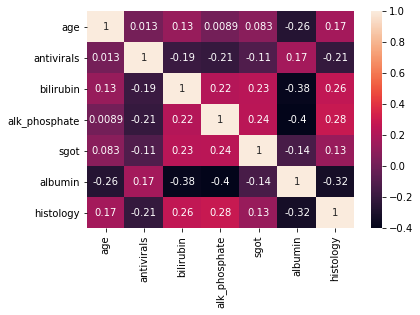

In [16]:
sns.heatmap(data.corr(), annot=True)

 The correlation plot here shows us that features 'bilirubin' and 'alk_phosphate' both have higher positive correlation with 'histology' and features 'bilirubin' and 'alk_phosphate' both have higher negative correlation with 'albumin'

<Figure size 1440x720 with 0 Axes>

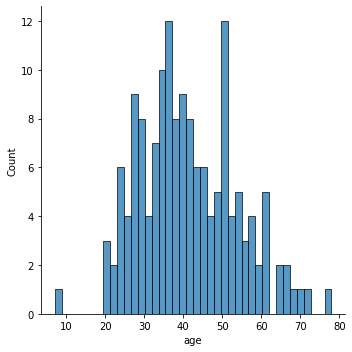

In [17]:
#creating a distplot 
plt.figure(figsize=(20, 10))
sns.displot(data.age, bins=40)

This shows that most of the people in the dataset are in the age between 25-50(approx.) with maximum people having age = 36-38 and 50-55. Only a few people with age<=30 and age>=62 suffer from Hepatitis

<Figure size 1440x720 with 0 Axes>

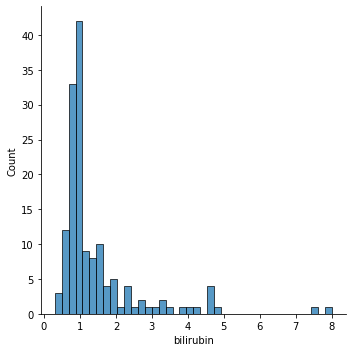

In [18]:
plt.figure(figsize=(20, 10))
sns.displot(data.bilirubin, bins=40)

the above plot indicate that people with lower bilirubin (values between 0-2) are more prone to Hepatitis

<Figure size 1440x720 with 0 Axes>

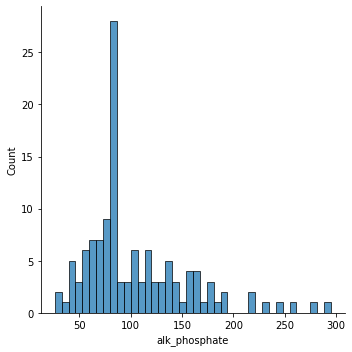

In [19]:
plt.figure(figsize=(20, 10))
sns.displot(data.alk_phosphate, bins=40)

This implies that Maximum people have alkaline phosphate value of 80-100

# Comparing the Gender Distribution in the given Dataset

<AxesSubplot:title={'center':'Gender Distribution'}>

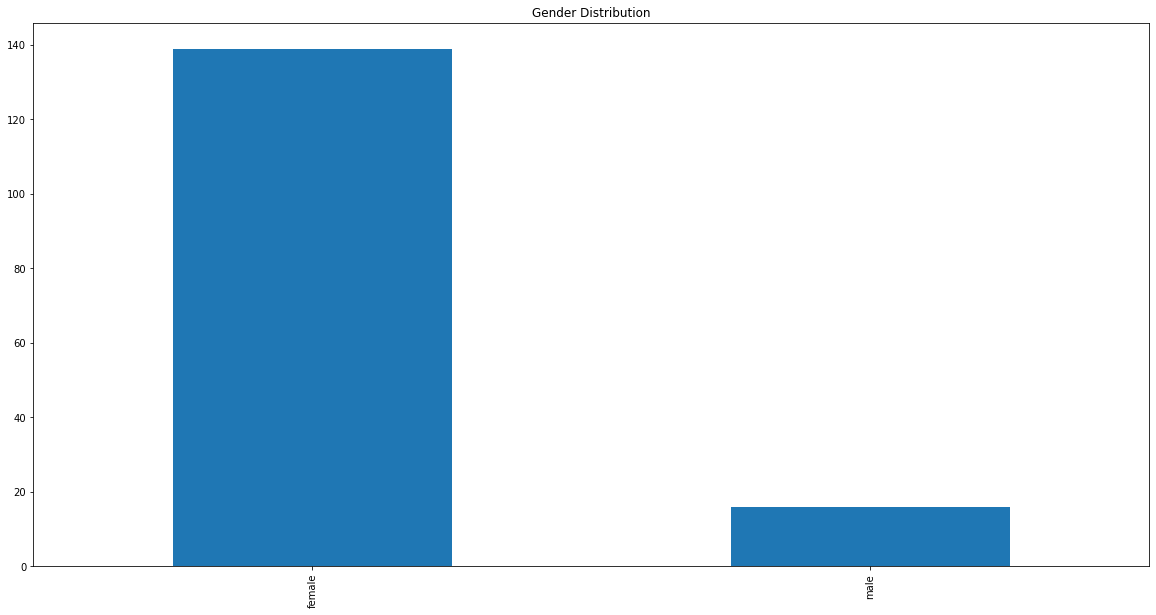

In [20]:
plt.figure(figsize=(20, 10))
data['sex'].value_counts().plot(kind="bar", title='Gender Distribution')

In [21]:
data['sex'].nunique()
data['sex'].value_counts()


female    139
male       16
Name: sex, dtype: int64

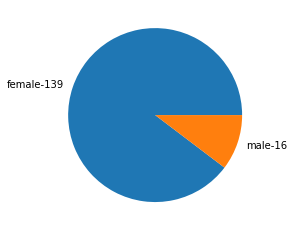

In [22]:
Pie_chart = np.array([139,16])
data1=['139,16']
labels1 =['female-139','male-16']
plt.pie(Pie_chart,labels=labels1)
plt.show()

most of the people in the given dataset are female and Females are more prone to Hepatitis as compared to Males

In [23]:
data['class'].value_counts()

live    123
die      32
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

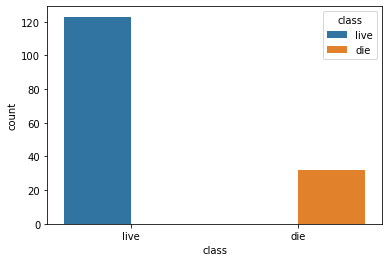

In [24]:
sns.countplot(x='class',hue='class',data=data)